In [2]:
import pandas as pd

In [3]:
file_path = 'a.csv' 
df = pd.read_csv(file_path)

print(df.head())

      time     tags   id score  temp C  x mm  y mm
0  01:52.2  sighter  MS1     5      27   157    63
1  01:53.1      NaN   L1     X      27   -20    -8
2  01:53.5  sighter  RS1     5      27  -251    -9
3  01:54.1      NaN   M1     X      27    -7    48
4  01:55.1      NaN   L2     X      27   -39    -8


In [4]:
left_df = df[df['id'].str.startswith('L')]
middle_df = df[df['id'].str.startswith('M')]
right_df = df[df['id'].str.startswith('R')]
print(left_df.head())
print(middle_df.head())
print(right_df.head())

       time tags  id score  temp C  x mm  y mm
1   01:53.1  NaN  L1     X      27   -20    -8
4   01:55.1  NaN  L2     X      27   -39    -8
7   01:57.4  NaN  L3     4      27   364    50
10  01:59.5  NaN  L4     5      27  -145   140
13  02:02.2  NaN  L5     5      27   152   -42
       time     tags   id score  temp C  x mm  y mm
0   01:52.2  sighter  MS1     5      27   157    63
3   01:54.1      NaN   M1     X      27    -7    48
6   01:56.5      NaN   M2     5      27  -113   -69
9   01:58.6      NaN   M3     5      27  -158    -4
12  02:01.2      NaN   M4     5      27   204   -67
       time     tags   id score  temp C  x mm  y mm
2   01:53.5  sighter  RS1     5      27  -251    -9
5   01:55.5  sighter  RS2     5      27  -119  -103
8   01:58.3      NaN   R1     5      27   238    91
11  02:00.5      NaN   R2     6      27    70   -35
14  02:03.0      NaN   R3     4      27   368    54


In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.ticker import MultipleLocator

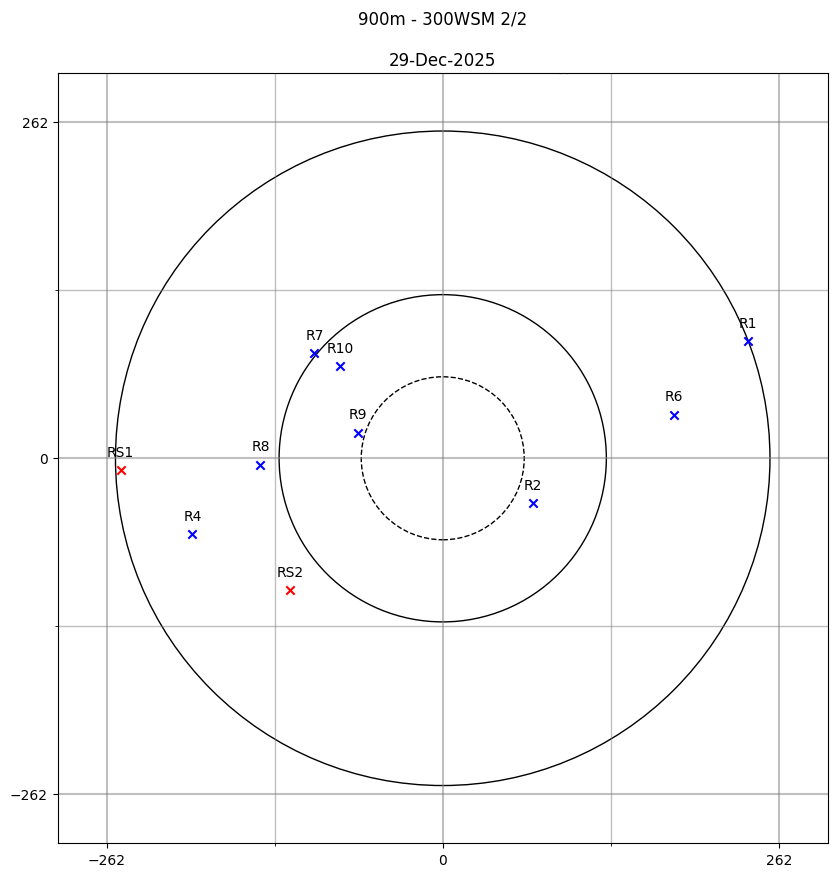

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ax.set_xlim(-300, 300)
ax.set_ylim(-300, 300)
ringX = plt.Circle((0, 0), 127/2, color='black', fill=False, linestyle='--', linewidth=1)
ring6 = plt.Circle((0, 0), 255/2, color='black', fill=False, linewidth=1)
ring5 = plt.Circle((0, 0), 510/2, color='black', fill=False, linewidth=1)
ax.add_patch(ringX)
ax.add_patch(ring6)
ax.add_patch(ring5)

major_spacing_x = 261.8 # Major grid lines every 2 units on the x-axis
minor_spacing_x = 130.9 # Minor grid lines every 0.5 units on the x-axis

major_spacing_y = 261.8 # Major grid lines every 3 units on the y-axis
minor_spacing_y = 130.9 # Minor grid lines every 1 unit on the y-axis
ax.xaxis.set_major_locator(MultipleLocator(major_spacing_x))
ax.xaxis.set_minor_locator(MultipleLocator(minor_spacing_x))
ax.yaxis.set_major_locator(MultipleLocator(major_spacing_y))
ax.yaxis.set_minor_locator(MultipleLocator(minor_spacing_y))
ax.grid(which='major', linestyle='-', linewidth='1.5', alpha=0.5, color='gray') # Customize major grid
ax.grid(which='minor', linestyle='-', linewidth='1.0', alpha=0.5, color='gray') # Customize minor grid
ax.set_title("900m - 300WSM 2/2\n\n29-Dec-2025")

for i, row in right_df.iterrows():
    x, y = row["x mm"], row["y mm"]
    label = row["id"]
    if 'S' in label:
        colour = 'red'
    else:
        colour = 'blue'
    plt.scatter(x, y, color=colour, marker='x', label='Point A')
    ax.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
